In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from package_Engels_Theo_Losseau_Baudouin import Lead_Lag_Discreet_RT, PID_RT, FF_RT, sim_tclabP, sim_tclabD,PID, IMC_Tuning_SOPDT,bodePID,bodePC,Margin

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

(0.0, 50.0)

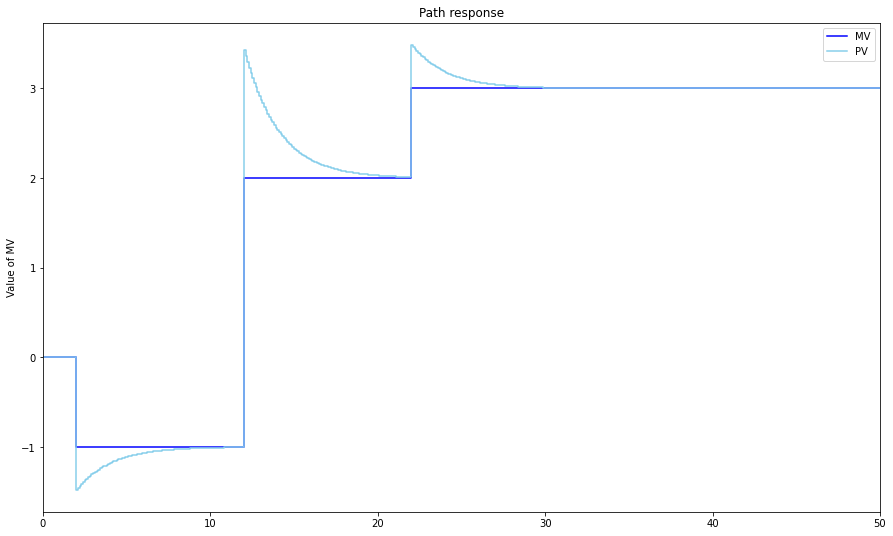

In [11]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 2: -1,12:2,22:3}

Tlead = 3
Tlag = 2

t = []
MV = []
PV = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Lead_Lag_Discreet_RT(MV,PV,Tlead,Tlag,0.1)
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,PV,'skyblue',label='PV',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

10001
10001


(0.0, 1000.0)

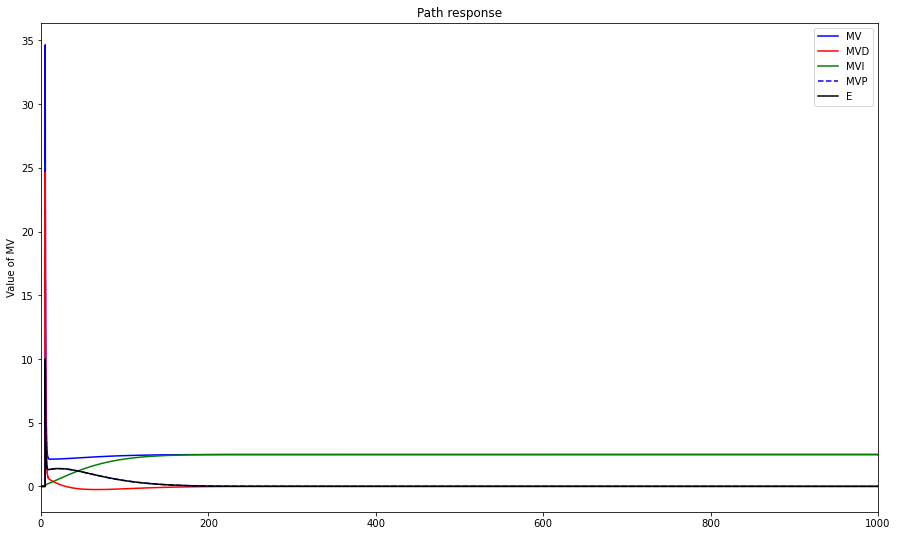

In [12]:
TSim = 1000
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
SPPath = {0: 0,5:10}
PVPath = {0:0}


# t = []
# MV = [0]
# PV = []
# SP = [0]
# MVP = []
# MVI = []
# MVD = []
# E = [0]
# Et = []


Kc = 1
Ti = 48
Td = 17
satMin = 0
satMax = 100

t = []
MV = []
PV = []
SP = []
MVP = []
MVI = []
MVD = []
E = []
Et = []


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    #SelectPath_RT(PVPath,t,PV)
    FO_RT(MV,4,10,Ts,PV)
    PID_RT(SP,PV,[0],[0],[0],Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E)

print(len(MV))
print(len(t))
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b',label='MV',where='post')
#plt.step(t,PV,'skyblue',label='PV',where='post')
plt.step(t,MVD,'red',label='MVD',where='post')
plt.step(t,MVI,'green',label='MVI',where='post')
plt.step(t,MVP,'b--',label='MVP',where='post')
plt.step(t,E,'black',label='E',where='post')
#plt.step(t,PV,'orange',label='PV',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

(0.0, 1000.0)

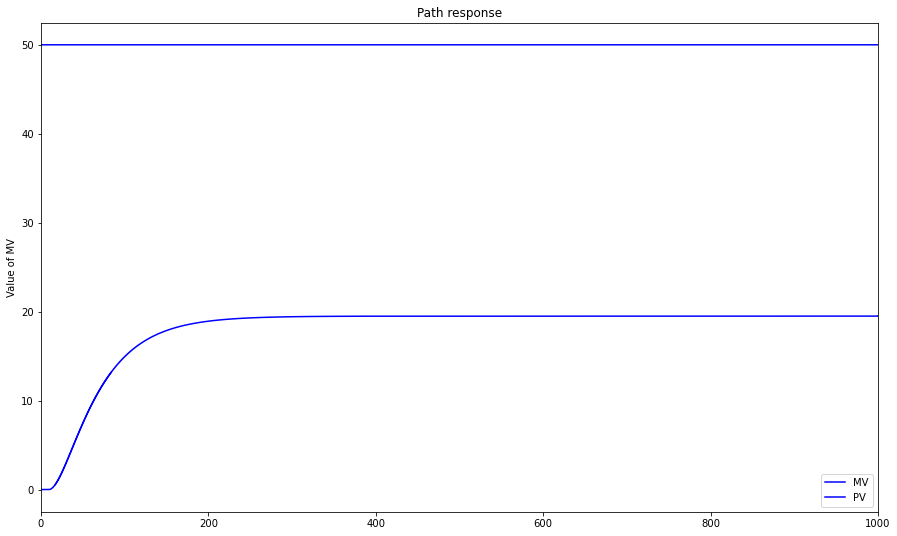

In [13]:
TSim = 1000
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0:50}



Tlead1 = 47.84
Tlag1 = 245.36
Tlead2 = 17.39
Tlag2 = 3.13
Theta1 = 9.31
Theta2 = 0.56
Kp = 0.39
Kd = 0.63

# t = []
# MV = [0]
# PV = []
# SP = [0]
# MVP = []
# MVI = []
# MVD = []
# E = [0]
# Et = []

t = []
MV = []
PV = []
SP = []
MVP = []
MVI = []
MVD = []
E = []
Et = []
PVtemp1=[]
PVtemp2=[]

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    sim_tclabP(MV,PV,Ts,PVtemp1,PVtemp2,Kp,Tlead1,Tlead2,Theta1)

    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b',label='MV',where='post')
plt.step(t,PV,'b',label='PV',where='post')

plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

In [62]:
TSim = 3000
Ts = 1
N = int(TSim/Ts) + 1
DV0=50
MV0 = 50
PV0 = 70



#montre experience pour pv0 en vrai

# Path for MV and MVMan
SPPath = {0: 70,2000:80}
#ManPath = {0:0,400:1,600:0}
ManPath = {0:1,1500:0}
MVManPath={0:50}
DVPath = {0:50,1000:70,2000:60}

#ParamP = {"K":0.3953,"T1":47.8373}

# t = []
# MV = [0]
# MVMan = []
# Man = []
# PV = []
# SP = [0]
# MVP = []
# MVI = []
# MVD = []
# E = [0]
# Et = []
# MVFF = []
# ODV = []
# OPV = []
# DV = []
# PVtemp1 = []
# PVtemp2 = []
# DVtemp1 = []
# DVtemp2 = []

# FFtemp1 = []
# FFtemp2 = []


t = []
MV = []
MVMan = []
Man = []
PV = []
SP = []
MVP = []
MVI = []
MVD = []
E = []
Et = []
MVFF = []
ODV = []
OPV = []
DV = []
PVtemp1 = []
PVtemp2 = []
DVtemp1 = []
DVtemp2 = []

FFtemp1 = []
FFtemp2 = []

Tlead1 = 47.84
Tlag1 = 245.36
Tlead2 = 17.39
Tlag2 = 3.13
Theta1 = 9.31
Theta2 = 0.56
Kp = 0.39
Kd = 0.63
gamma = 0.2
Kc,Ti,Td = IMC_Tuning_SOPDT(Kp,Tlead1,Tlead2,Theta1,gamma)


# for i in range(0,N):
#     t.append(i*Ts)
#     SelectPath_RT(SPPath,t,SP)
#     SelectPath_RT(DVPath,t,DV)
#     SelectPath_RT(ManPath,t,Man)
#     SelectPath_RT(MVManPath,t,MVMan)
#     DV[-1]-=DV0
    
#     #-----------------------------------------------------------------------------
#     #run with measured value of real tclab
#     FF_RT(DV,DV0,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,FFtemp1,FFtemp2)
#     PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E,ManFF = 1)
#     sim_tclabP(MV,OPV,Ts,PVtemp1,PVtemp2,Kp,Tlead1,Tlead2,Theta1)
#     sim_tclabD(DV,ODV,Ts,DV0,DVtemp1,DVtemp2,Kd,Tlag1,Tlag2,Theta2)
#     PV.append(OPV[-1]+ODV[-1]+PV0-Kp*MV0)
#     #---------------------------------------------
#     #-----------------------------------------------------------------------------
#     #run with slider values
#     interact(PID_RT)
#     FF_RT(DV,DV0,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,FFtemp1,FFtemp2)
#     PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E,ManFF = 1)
#     sim_tclabP(MV,OPV,Ts,PVtemp1,PVtemp2,Kp,Tlead1,Tlead2,Theta1)
#     sim_tclabD(DV,ODV,Ts,DV0,DVtemp1,DVtemp2,Kd,Tlag1,Tlag2,Theta2)
#     PV.append(OPV[-1]+ODV[-1]+PV0-Kp*MV0)
#     #---------------------------------------------
    

def run(gamma, alph):
    t = []
    MV = []
    MVMan = []
    Man = []
    PV = []
    SP = []
    MVP = []
    MVI = []
    MVD = []
    E = []
    Et = []
    MVFF = []
    ODV = []
    OPV = []
    DV = []
    PVtemp1 = []
    PVtemp2 = []
    DVtemp1 = []
    DVtemp2 = []

    FFtemp1 = []
    FFtemp2 = []
    Kc,Ti,Td = IMC_Tuning_SOPDT(Kp,Tlead1,Tlead2,Theta1,gamma)
    for i in range(0,N):
        t.append(i*Ts)
        SelectPath_RT(SPPath,t,SP)
        SelectPath_RT(DVPath,t,DV)
        SelectPath_RT(ManPath,t,Man)
        SelectPath_RT(MVManPath,t,MVMan)
        DV[-1]-=DV0


        FF_RT(DV,DV0,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,FFtemp1,FFtemp2)
        PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E,alpha=alph,ManFF = 1)
        sim_tclabP(MV,OPV,Ts,PVtemp1,PVtemp2,Kp,Tlead1,Tlead2,Theta1)
        sim_tclabD(DV,ODV,Ts,DV0,DVtemp1,DVtemp2,Kd,Tlag1,Tlag2,Theta2)
        PV.append(OPV[-1]+ODV[-1]+PV0-Kp*MV0)
    
    fig,(ax,bx,cx,dx) = plt.subplots(4)
    fig.set_figheight(22)
    fig.set_figwidth(22)
    
    ax.plot(t,Man,'black')
    ax.set(ylabel='Value of MAN')

    bx.plot(t,MV,'blue',label = "MV")
    bx.set(ylabel='Value of MV')

    cx.plot(t,PV[:-1],'green',label="PV")
    cx.plot(t,SP,'black',label = "SP")
    cx.set(ylabel='Value of PV and SP')
    cx.legend(loc='best')


    dx.plot(t,DV,'red')
    dx.set(ylabel='Value of DV')
    print(gamma)
    return


interact(run,gamma=0.2,alph=0.4)


# print(len(MV))
# print(len(t))
# print(OPV)
# plt.figure(figsize = (15,9))

# plt.step(t,MV,'b',label='MV',where='post')
# #plt.step(t,PV,'skyblue',label='PV',where='post')
# plt.step(t,MVD,'red',label='MVD',where='post')
# plt.step(t,MVI,'green',label='MVI',where='post')
# plt.step(t,MVP,'b--',label='MVP',where='post')
# plt.step(t,E,'black',label='E',where='post')
# plt.step(t,DV,'brown',label='DV',where='post')
# plt.step(t,PV,'pink',label='PV',where='post')
# plt.ylabel('Value of MV')
# plt.legend(loc='best')
# plt.title('Path response')
# plt.xlim([0, TSim])



interactive(children=(FloatSlider(value=0.2, description='gamma', max=0.6000000000000001, min=-0.2), FloatSlid…

<function __main__.run(gamma, alph)>

[Text(0, 0.5, 'Value of DV')]

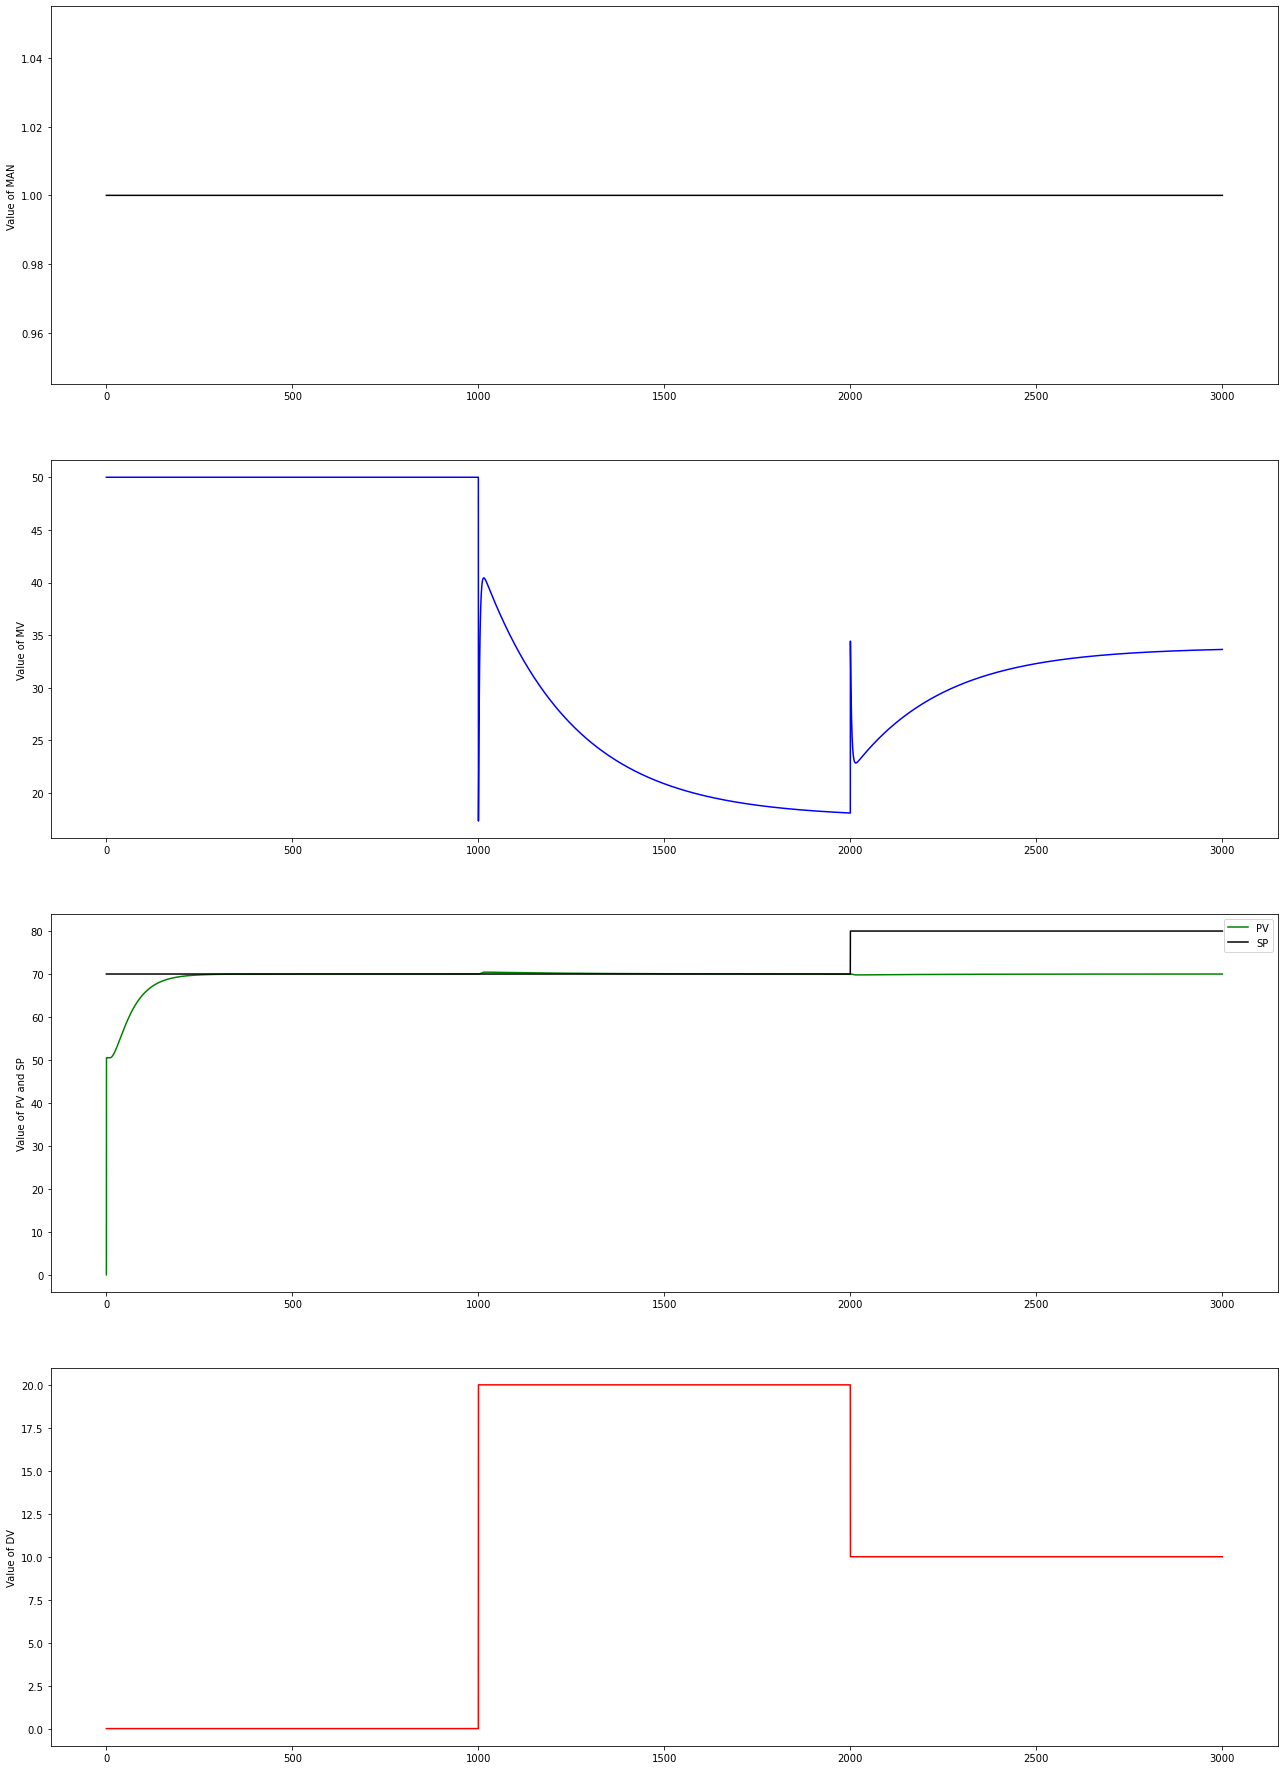

In [48]:
fig,(ax,bx,cx,dx) = plt.subplots(4)
fig.set_figheight(32)
fig.set_figwidth(22)

ax.plot(t,Man,'black')
ax.set(ylabel='Value of MAN')

bx.plot(t,MV,'blue',label = "MV")
bx.set(ylabel='Value of MV')

cx.plot(t,PV[:-1],'green',label="PV")
cx.plot(t,SP,'black',label = "SP")
cx.set(ylabel='Value of PV and SP')
cx.legend(loc='best')


dx.plot(t,DV,'red')
dx.set(ylabel='Value of DV')

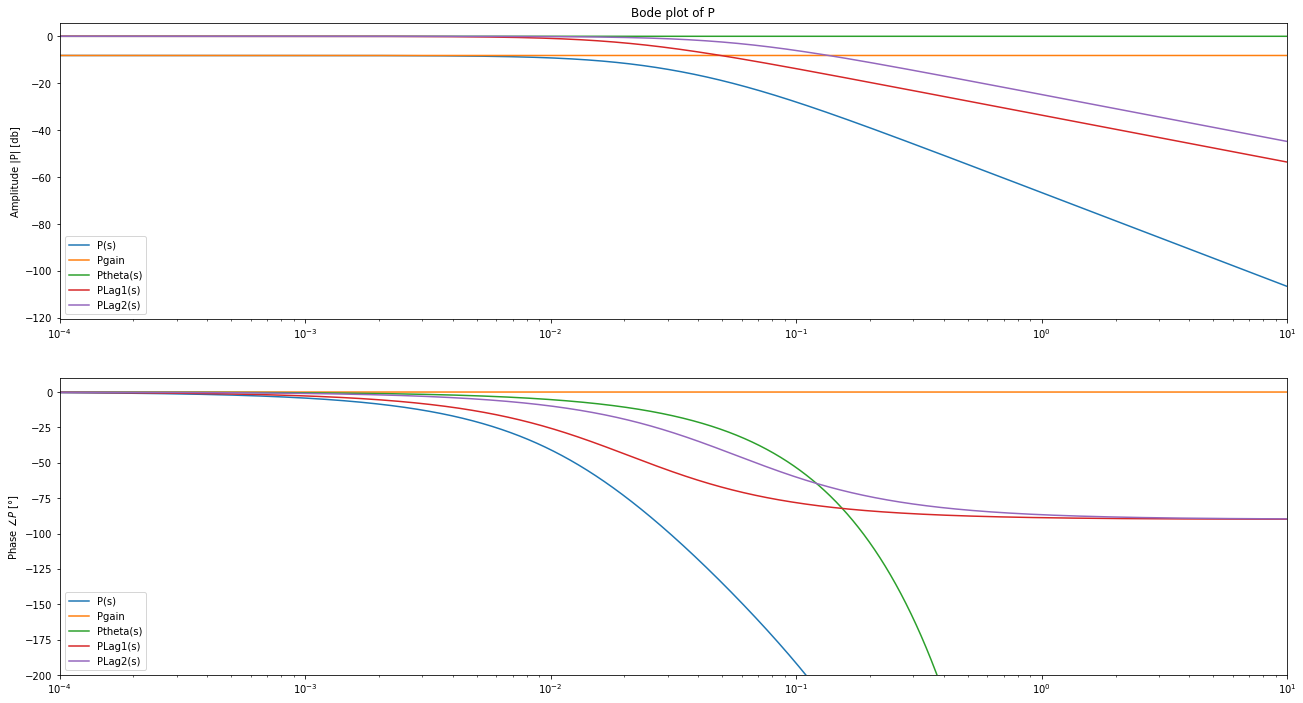

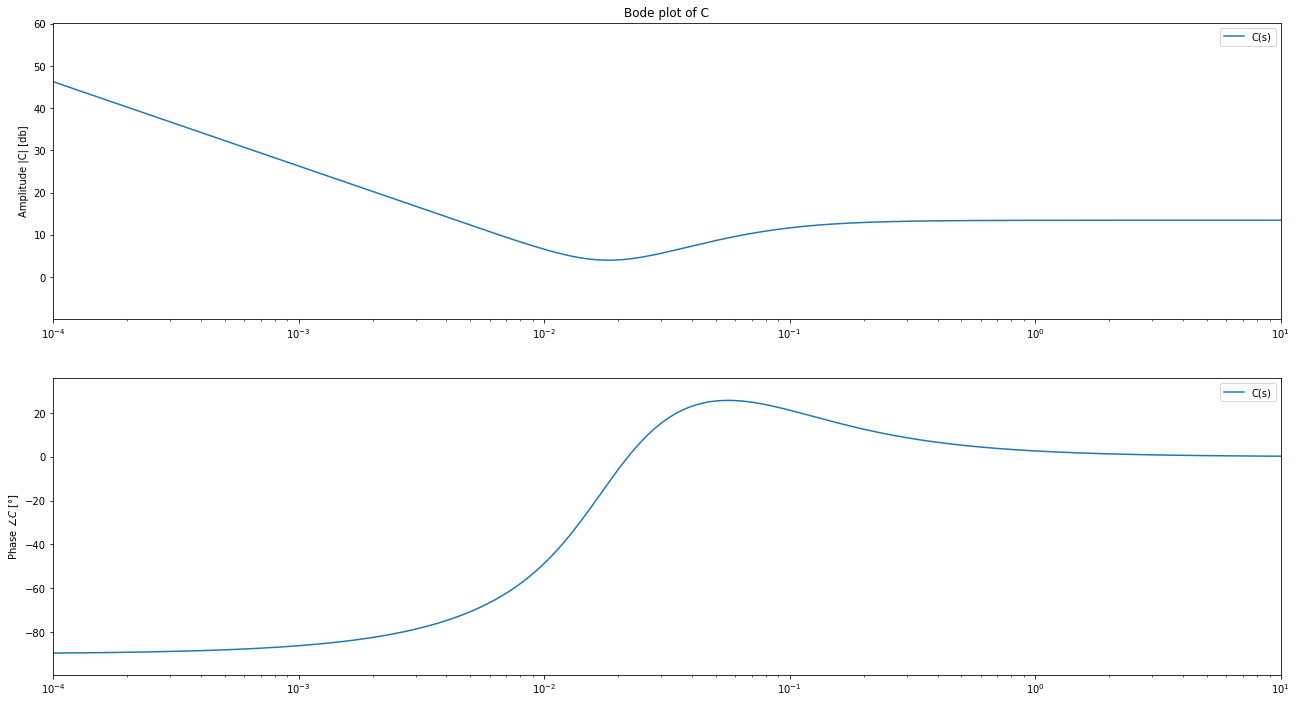

In [16]:
P = Process({})
P.parameters['Kp']=0.39
P.parameters['Tlag1']=47.83
P.parameters['Tlag2']=17.39
P.parameters['theta']=9.31
C = PID({})
C.parameters['Kc']=Kc
C.parameters['Ti']=Ti
C.parameters['Td']=Td
#C.parameters['alpha'] = alpha
omega = np.logspace(-4, 1, 10000)
Bode(P,omega)
bodePID(C,omega)

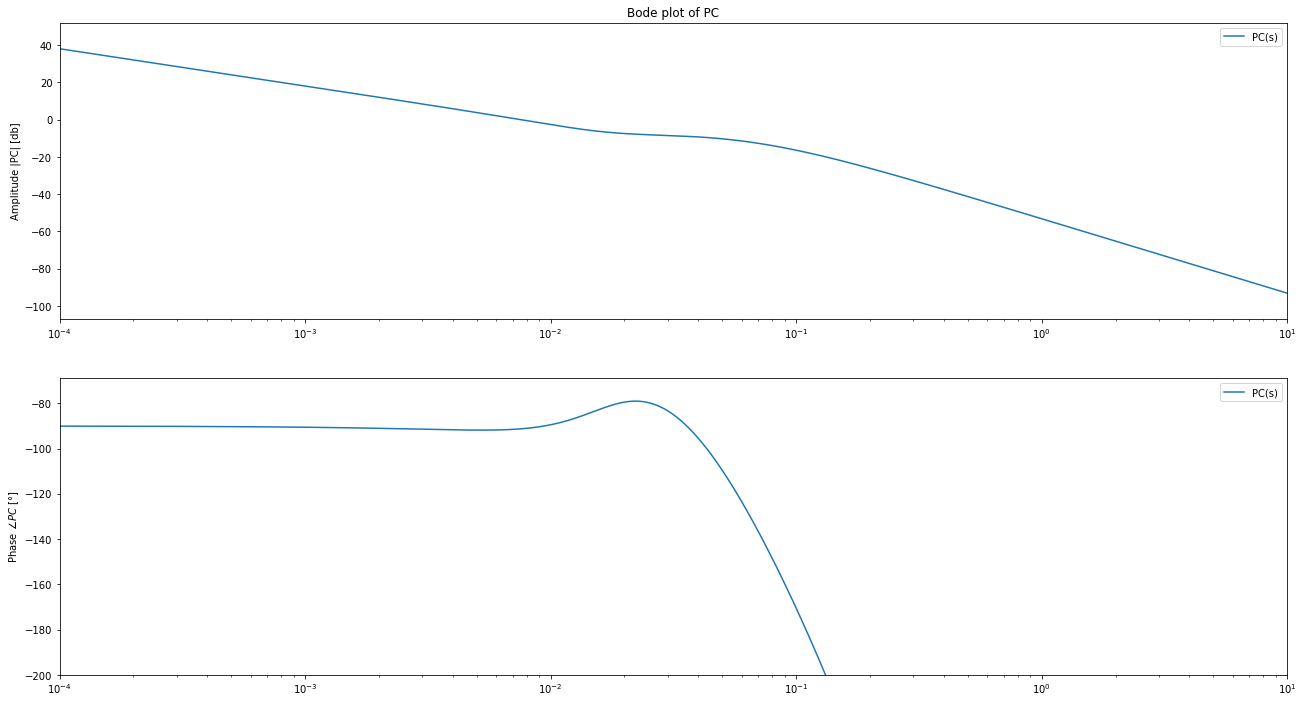

In [17]:
bodePC(P,C,omega)

17.478641226107822
88.76260363562568


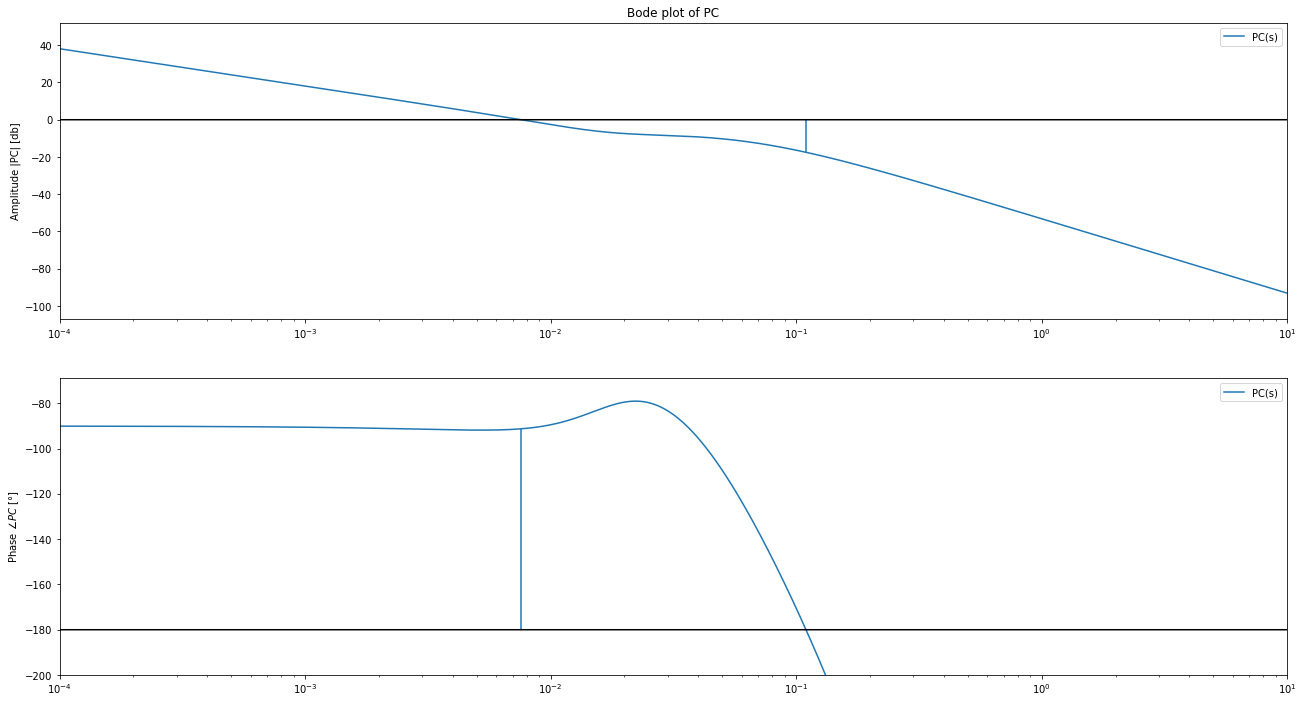

In [18]:
Margin(P,C,omega)